<a href="https://colab.research.google.com/github/mindang/pytorch-master/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%EC%B4%88_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!는 한줄씩 실행되도록 !가 없으면 오류 발생
!pip3 install torch
!pip3 install torchvision

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [ ]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

Files already downloaded and verified
Files already downloaded and verified


<PIL.Image.Image image mode=RGB size=32x32 at 0x7F49E9C1EBB0> 1 automobile
(32, 32, 3)


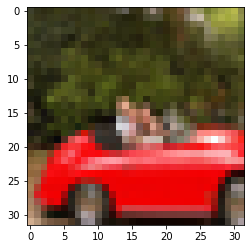

In [ ]:
img ,label = cifar10[99]
print(img , label , class_names[label])
print(np.array(img).shape)
plt.imshow(img)
plt.show()

In [ ]:
#텐서로 변환
from torchvision import transforms
to_tensor = transforms.ToTensor()
img , _ = cifar10[99]
img_t = to_tensor(img)
img_t.shape , img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

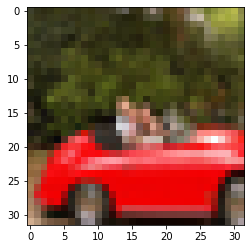

In [ ]:
img_tt = img_t.permute(1,2,0)
plt.imshow(img_tt)
plt.show()

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

torch.Size([3, 32, 32])


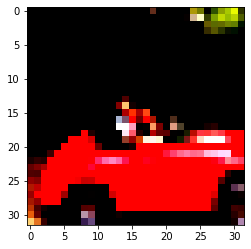

In [ ]:
img_t, _ = transformed_cifar10[99]
print(img_t.shape)
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

#새와 비행기 분류

In [5]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [6]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [7]:
len(cifar2) , len(cifar2_val)

(10000, 2000)

In [30]:
import torch.nn as nn
n_out = 2

model = nn.Sequential(
    nn.Linear(3*32*32,512),
    nn.Tanh(),
    nn.Linear(512,n_out),
    nn.Softmax(dim=1)
)

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [31]:
x = torch.tensor([1,2,3]).float()
print(softmax(x))
softmax_nn = nn.Softmax(dim=0)
print(softmax_nn(x))

tensor([0.0900, 0.2447, 0.6652])
tensor([0.0900, 0.2447, 0.6652])


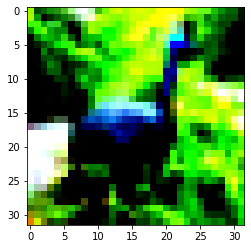

In [32]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [33]:
img_b = img.view(-1).unsqueeze(0)
print(model(img_b))
print(torch.max(model(img_b),dim=1))

tensor([[0.5221, 0.4779]], grad_fn=<SoftmaxBackward0>)
torch.return_types.max(
values=tensor([0.5221], grad_fn=<MaxBackward0>),
indices=tensor([0]))


In [38]:
img , label = cifar2[100]
tensor_tmp = torch.tensor([label])
out = model(img.view(-1).unsqueeze(0))
print(out , tensor_tmp)
loss = nn.NLLLoss()
print(loss(out,torch.tensor([label])))

tensor([[0.5108, 0.4892]], grad_fn=<SoftmaxBackward0>) tensor([1])
tensor(-0.4892, grad_fn=<NllLossBackward0>)


#훈련

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 3.437544
Epoch: 1, Loss: 4.496042
Epoch: 2, Loss: 5.622531
Epoch: 3, Loss: 7.967731
Epoch: 4, Loss: 6.857869


In [44]:
#데이터로더 사용
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch == 1 or epoch % 10 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.414974
Epoch: 1, Loss: 0.579111
Epoch: 10, Loss: 0.275349
Epoch: 20, Loss: 0.332422
Epoch: 30, Loss: 0.240568
Epoch: 40, Loss: 0.123306
Epoch: 50, Loss: 0.101182
Epoch: 60, Loss: 0.020487
Epoch: 70, Loss: 0.039522
Epoch: 80, Loss: 0.039951
Epoch: 90, Loss: 0.030357


In [43]:
#정확도 측정
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.847500


In [45]:
#데이터로더 사용 / 뉴런 512
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch == 1 or epoch % 10 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Epoch: 0, Loss: 0.409495
Epoch: 1, Loss: 0.505700
Epoch: 10, Loss: 0.464829
Epoch: 20, Loss: 0.217576
Epoch: 30, Loss: 0.029626
Epoch: 40, Loss: 0.046551
Epoch: 50, Loss: 0.053049
Epoch: 60, Loss: 0.130765
Epoch: 70, Loss: 0.013309
Epoch: 80, Loss: 0.011514
Epoch: 90, Loss: 0.010255
Accuracy: 0.998800


In [46]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.827000


#모델 복잡도 높히기

In [48]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
      print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.586781
Epoch: 10, Loss: 0.339070
Epoch: 20, Loss: 0.247621
Epoch: 30, Loss: 0.197813
Epoch: 40, Loss: 0.060488
Epoch: 50, Loss: 0.056887
Epoch: 60, Loss: 0.005595
Epoch: 70, Loss: 0.004469
Epoch: 80, Loss: 0.011315
Epoch: 90, Loss: 0.001640


In [49]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [50]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.817000
